# CMSC320 Final Project
## Kinsey Smith, Sarah Bullard, Yiwen Shen 

## Introduction

Our project is surrounding the Twitter account of the United States' current president, Donald Trump (@realDonaldTrump). We focused on the sentiment of the tweets of this account versus each individual tweet's replies. Our intention was to find out the difference between the sentiment of the tweet and the sentiment of its replies, and how it would reflect our current political climate. <b>Our hypothesis was that Donald Trump's account would have more negative replies to his positive tweets, since the current political climate (especially on December 9th, 2017, the date that we chose to analyze his tweets) does not favor Donald Trump.</b>

<img src="trump_twitter_image.jpg">

Sentiment analysis is a way of classifying a text as having a positive, negative, or neutral sentiment using text analysis. Just using sentiment analysis should be enough for us to classify the tweets as positive, negative, or neutral. However, <b>sentiment analysis has not been able to fully detect things such as sarcasm and satire</b>, and Trump's replies are full of people who are using sarcasm and satire. He has even been called the "Most Trolled Person On the Internet" by a news outlet (https://www.scoopwhoop.com/Heres-Why-Donald-Trump-Is-The-Most-Trolled-Person-On-The-Internet-These-Days/). Therefore, we had to think of other features to incorporate in order to truly analyze the sentimentality of each tweet.

Side note: <b>We did not use these extra feature vectors on Trump's tweets</b>, since there was a very low probability that Trump was being sarcastic in his tweets, as when he is being "sarcastic", he is actually just making a negative comment about a person or organization and says it is misinterpreted (http://abcnews.go.com/Politics/times-donald-trump-sarcastic-misinterpreted/story?id=41328374). Instead, we used these feature vectors on Trump's followers and the sample of replies we collected from them. 


<b> The features in our feature vector are as follows: </b>

Our first feature was the original sentiment analysis, because although it is not reliably conclusive on its own, it can give us a basis about the mood of the sentence. 

The second feature we worked on focused on the user who posted the reply to the specific tweet. We checked whether or not the user was following other accounts that aligned with Donald Trump's or BLM's views, including politicians of either party.

The third feature we worked on also focused on the user who posted the reply to the specific tweet. We compared the user's hashtags for the last year to known Trump-positive and BLM-positive hashtags, and noted numerically the number of hashtags that were similar for each user. 


After we collected the features, we used the <b> name of classifier </b> to classify the data. Since the dataset we used was small (for reasons that will be explained further in this notebook), we created the training dataset ourselves and compared that to the real dataset using that classifier. 

This notebook will be organized into four parts: Data Extraction, Data Manipulation, Data Analysis, and Data Visualization. Each part will show how we manipulated the Twitter's API in order to get the tweets that we need and come to the conclusion that we have. 

## Data Extraction

In [1]:
# All of the imports that we need for the project.
import tweepy
from tweepy import Cursor
import textblob
import numpy as np
import pandas as pd
import collections
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import unicodecsv
from unidecode import unidecode
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Accessing Twitter's Data

In order to access Twitter's API, we had to create applications and personally get authentication tokens. Even though anyone that has a Twitter account is allowed access to Twitter's data as long as they fill out an Application form, we cannot give out these confidential tokens on this public notebook becuase it is a privacy risk. In order to get past this hurdle, we created a function that would pull from our own files on our own machines for these tokens. In the cell below is a copy of credentials.py, without the confidential information. See below the code we used to access Twitter's API in order to get the data. 

#### An example of credentials.py 
* Comment on file - This is a file that holds confidential information about a Twitter user and their authentication tokens. Please do not read further if you are not authorized.
  
CONSUMER_KEY = ' '

CONSUMER_SECRET = ' '

ACCESS_TOKEN = ' '

ACCESS_SECRET = ' '


In [1]:
from credentials import *
#A function that takes these credentials and sets up the API.
def api_setup():
    #application authentication allows more data retrival 
    auth = tweepy.AppAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
    return api
# Extracting the tweets
extract_tweets = api_setup()

In [ ]:
# Donald Trump Replies
tweet_ids_donald = []
for page in tweepy.Cursor(extract_tweets.user_timeline,screen_name="realDonaldTrump").pages(20):
    for item in page:
        tweet_ids_donald.append(item.id_str)

In [ ]:
query = tweepy.Cursor(extract_tweets.search,q="to:realDonaldTrump").items(5000)

In [ ]:
query2 = tweepy.Cursor(extract_tweets.search,q="to:Blklivesmatter").items(20000)

In [ ]:
for tweet in query:
    if replies_donald.get(tweet.in_reply_to_status_id_str) != None:
        #add it to the csv

In [ ]:
for tweet in query2:
    if replies_blm.get(tweet.in_reply_to_status_id_str) != None:
        #add it to the csv

### Adding the data to their individual CSVs

Once we accessed the data from Twitter's API, we started querying. However, since Twitter has a rule of a maximum of 15 queries in 15 minutes, and we were querying for replies of more than 15 tweets, we had to find another way to access the data when working with it. Since Donald Trump also tweets really often each day, and we were only able to slowly get the data, we decided to analyze the data from his tweets on December 9th, 2017, and their replies. December 9th was the date we chose because Trump had tweeted a mix of controversial and non-controversial tweets that day, and then we could see whether or not the sentimentality of the replies for each tweet was being affected by the controversiality of each tweet itself. Their replies were not dated, but we chose them randomly from the total replies to each tweet. We added the tweets of that day and their replies to individual CSVs to work with them. We slowly added them to these CSVs to circumvent the 15-queries-maximum rule.

<b> Getting Donald Trump Tweets. </b>

The piece of code below that is referenced from nicolewhite will find all trump's tweets for a year and add it to a csv called trump_tweets.csv. 

In [ ]:
#https://gist.github.com/nicolewhite/167828e51d8f2b6fad75
users = ["realDonaldTrump"]
with open('trump_tweets.csv', 'wb') as file:
    writer = unicodecsv.writer(file, delimiter = ',', quotechar = '"')
    # Write header row.
    writer.writerow(["name",
                    "username",
                    "followers_count",
                    "listed_count",
                    "following",
                    "favorites",
                    "verified",
                    "default_profile",
                    "location",
                    "time_zone",
                    "statuses_count",
                    "description",
                    "geo_enabled",
                    "contributors_enabled",
                    "tweet_id",
                    "tweet_time",
                    "tweet_text",
                    "tweet_lat",
                    "tweet_long",
                    "tweet_source",
                    "tweet_in_reply_to_screen_name",
                    "tweet_direct_reply",
                    "tweet_retweet_status",
                    "tweet_retweet_count",
                    "tweet_favorite_count",
                    "tweet_hashtags",
                    "tweet_hashtags_count",
                    "tweet_urls",
                    "tweet_urls_count",
                    "tweet_user_mentions",
                    "tweet_user_mentions_count",
                    "tweet_media_type",
                    "tweet_contributors"])

    for user in users:
        user_obj = api.get_user(user)

        # Gather info specific to the current user.
        user_info = [user_obj.name,
                     user_obj.screen_name,
                     user_obj.followers_count,
                     user_obj.listed_count,
                     user_obj.friends_count,
                     user_obj.favourites_count,
                     user_obj.verified,
                     user_obj.default_profile,
                     user_obj.location,
                     user_obj.time_zone,
                     user_obj.statuses_count,
                     user_obj.description,
                     user_obj.geo_enabled,
                     user_obj.contributors_enabled]

        # Get 5000 most recent tweets for the current user.
        # api.search, q="to:"+user  api.user_timeline, screen_name = user 

        
        for tweet in Cursor(api.user_timeline, screen_name = user).items(5000):

            # Latitude and longitude stored as array of floats within a dictionary.
            lat = tweet.coordinates['coordinates'][1] if tweet.coordinates != None else None
            long = tweet.coordinates['coordinates'][0] if tweet.coordinates != None else None
            # If tweet is not in reply to a screen name, it is not a direct reply.
            direct_reply = True if tweet.in_reply_to_screen_name != "" else False
            # Retweets start with "RT ..."
            retweet_status = True if tweet.text[0:3] == "RT " else False

            # Get info specific to the current tweet of the current user.
            tweet_info = [tweet.id,
                          tweet.created_at,
                          unidecode(tweet.text),
                          lat,
                          long,
                          tweet.source,
                          tweet.in_reply_to_screen_name,
                          direct_reply,
                          retweet_status,
                          tweet.retweet_count,
                          tweet.favorite_count]

            # Below entities are stored as variable-length dictionaries, if present.
            hashtags = []
            hashtags_data = tweet.entities.get('hashtags', None)
            if(hashtags_data != None):
                for i in range(len(hashtags_data)):
                    hashtags.append(unidecode(hashtags_data[i]['text']))

            urls = []
            urls_data = tweet.entities.get('urls', None)
            if(urls_data != None):
                for i in range(len(urls_data)):
                    urls.append(unidecode(urls_data[i]['url']))

            user_mentions = []
            user_mentions_data = tweet.entities.get('user_mentions', None)
            if(user_mentions_data != None):
                for i in range(len(user_mentions_data)):
                    user_mentions.append(unidecode(user_mentions_data[i]['screen_name']))

            media = []
            media_data = tweet.entities.get('media', None)
            if(media_data != None):
                for i in range(len(media_data)):
                    media.append(unidecode(media_data[i]['type']))

            contributors = []
            if(tweet.contributors != None):
                for contributor in tweet.contributors:
                    contributors.append(unidecode(contributor['screen_name']))

            more_tweet_info = [', '.join(hashtags),
                               len(hashtags),
                               ', '.join(urls),
                               len(urls),
                               ', '.join(user_mentions),
                               len(user_mentions),
                               ', '.join(media),
                               ', '.join(contributors)]

            # Write data to CSV.
            writer.writerow(user_info + tweet_info + more_tweet_info)

        # Show progress.
        print("Wrote tweets by %s to CSV." % user)

<b> Getting replies to Donald Trump Tweets. </b>

The following code will collect replies to trump's tweet to a csv file. Due to twitter's rate limit on search api we only collect 20 replies. With the reply_id we will be able to see which Trump's tweet above the user is replying to.

In [ ]:
tweet_id_list = data_donald['tweet_id'].tolist()

with open('trump_replies.csv', 'wb') as file:
    writer = unicodecsv.writer(file, delimiter = ',', quotechar = '"')
    writer.writerow([
                    "username",
                    "id",
                    "reply_id",
                    "date",
                    "tweet"
                    ])
                     

    for otweet_id in tweet_id_list:
        
        i=0
        print(otweet_id)
        for tweet in tweepy.Cursor(extractor.search, q="to:realDonaldTrump", since_id= otweet_id).items():
                
                
            if str(tweet.in_reply_to_status_id) == str(otweet_id):
                i=i+1
                print(i)
                if(i==20):
                    break

                info = [tweet.user.screen_name,
                         tweet.id,
                         tweet.in_reply_to_status_id,
                         tweet.created_at,
                         unidecode(tweet.text),
                        ]


                writer.writerow(info)

### Collecting the Data in a Functional Way

Now that the data is in a csv and collected, we can put it into a dataframe to work with. 

We also deleted unnecessary columns in the tweet json, like followers_count and following, which don't matter in regards to what we are doing. Since the Twitter json structure doesn't include the tweet id itself and (if it is a reply) the id of the tweet it is replying to, we had to put that information as well as the text of the tweet (to match them) into a separate CSV and compare them to add both sets of information to the dataframe.

In [2]:
# The Donald Tweets
data_donald = pd.read_csv("trump_tweets.csv", dtype={'tweet_id':str})
del data_donald["name"]
del data_donald["followers_count"]
del data_donald["listed_count"]
del data_donald["following"]
del data_donald["favorites"]
del data_donald["verified"]
del data_donald["default_profile"]
del data_donald["statuses_count"]
del data_donald["description"]
del data_donald["geo_enabled"]
del data_donald["contributors_enabled"]
del data_donald["tweet_lat"]
del data_donald["tweet_long"]
del data_donald["tweet_source"]
del data_donald["tweet_in_reply_to_screen_name"]
del data_donald["tweet_direct_reply"]
del data_donald["tweet_retweet_count"]
del data_donald["tweet_favorite_count"]
del data_donald["tweet_hashtags_count"]
del data_donald["tweet_urls"]
del data_donald["tweet_urls_count"]
del data_donald["tweet_retweet_status"]
del data_donald["tweet_hashtags"]
del data_donald["tweet_user_mentions"]
del data_donald["tweet_media_type"]
del data_donald["tweet_contributors"]
del data_donald["tweet_user_mentions_count"]
del data_donald["location"]
del data_donald["time_zone"]
data_donald.head()

,username,tweet_id,tweet_time,tweet_text
0,realDonaldTrump,939680422493073408,2017-12-10 02:17:25,No American should be separated from their lov...
1,realDonaldTrump,939642796289470464,2017-12-09 23:47:55,Great Army - Navy Game. Army wins 14 to 13 and...
2,realDonaldTrump,939634404267380736,2017-12-09 23:14:34,.@daveweigel of the Washington Post just admit...
3,realDonaldTrump,939616077356642304,2017-12-09 22:01:44,.@DaveWeigel @WashingtonPost put out a phony p...
4,realDonaldTrump,939564681743814661,2017-12-09 18:37:31,"Have a great game today, @USArmy and @USNavy -..."


Below is the dataframe resulting from the trump_replies CSV. As we notice due to the constraint of the search api, the replies we got are all very recent as in 12-11 compared with the 12-9 in the original tweets. This is due to the search api searching from most recent and we have no comntrol of. This may affect the result as the recent tweets may be affected by recent events. This can be solbved by uisng a better search engine that dosen't have rate limit and can sample search result

In [3]:
# Replies of Trump
data_donald_replies = pd.read_csv("trump_replies.csv", dtype={'reply_id':str})

data_donald_replies.head()

,username,id,reply_id,date,tweet
0,ZoltanCaptain,940075314398486528,939642796289470464,2017-12-11 04:26:35,@realDonaldTrump Resign before you are impeach...
1,nodictatorinusa,940073512282218496,939642796289470464,2017-12-11 04:19:25,@realDonaldTrump https://t.co/tuQNvmQYEZ
2,1MikeMerica,940073344891699200,939642796289470464,2017-12-11 04:18:45,@realDonaldTrump Now go play roulette in Russia
3,rondavt74,940072314086887424,939642796289470464,2017-12-11 04:14:40,@realDonaldTrump https://t.co/sIPqjPoX3s
4,TMHansen0528,940071620823040001,939642796289470464,2017-12-11 04:11:54,@realDonaldTrump You know nothing about football!


### Sentiment Analysis

As explained before, sentiment analysis is a basic way of analyzing a text to tell if it is of positive, negative, or neutral sentiment. NLTK is the library we will use to do this section. This will be one of the features for the feature vector. 

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
#Getting the sentiment analysis for each type of tweet
neg_donald = []
pos_donald = []
neu_donald = []
comp_donald = []
neg_donald_replies = []
pos_donald_replies = []
neu_donald_replies = []
comp_donald_replies = []
for _,x in data_donald.iterrows():
    neg_donald.append(sia.polarity_scores(x["tweet_text"])["neg"])
    pos_donald.append(sia.polarity_scores(x["tweet_text"])["pos"])
    neu_donald.append(sia.polarity_scores(x["tweet_text"])["neu"])
    comp_donald.append(sia.polarity_scores(x["tweet_text"])["compound"])
for _,x in data_donald_replies.iterrows():
    neg_donald_replies.append(sia.polarity_scores(x["tweet"])["neg"])
    pos_donald_replies.append(sia.polarity_scores(x["tweet"])["pos"])
    neu_donald_replies.append(sia.polarity_scores(x["tweet"])["neu"])
    comp_donald_replies.append(sia.polarity_scores(x["tweet"])["compound"])

In [5]:
#Adding the scores to the columns of the dataframe
data_donald["neg_sentiment"] = neg_donald
data_donald["pos_sentiment"] = pos_donald
data_donald["neu_sentiment"] = neu_donald
data_donald["comp_sentiment"] = comp_donald
data_donald_replies["neg_sentiment"] = neg_donald_replies
data_donald_replies["pos_sentiment"] = pos_donald_replies
data_donald_replies["neu_sentiment"] = neu_donald_replies
data_donald_replies["comp_sentiment"] = comp_donald_replies

In [26]:
data_donald.head()

,username,tweet_id,tweet_time,tweet_text,neg_sentiment,pos_sentiment,neu_sentiment,comp_sentiment
0,realDonaldTrump,939680422493073408,2017-12-10 02:17:25,No American should be separated from their lov...,0.213,0.225,0.562,0.0772
1,realDonaldTrump,939642796289470464,2017-12-09 23:47:55,Great Army - Navy Game. Army wins 14 to 13 and...,0.000,0.486,0.514,0.9229
2,realDonaldTrump,939634404267380736,2017-12-09 23:14:34,.@daveweigel of the Washington Post just admit...,0.235,0.062,0.704,-0.6046
3,realDonaldTrump,939616077356642304,2017-12-09 22:01:44,.@DaveWeigel @WashingtonPost put out a phony p...,0.096,0.000,0.904,-0.2023
4,realDonaldTrump,939564681743814661,2017-12-09 18:37:31,"Have a great game today, @USArmy and @USNavy -...",0.000,0.304,0.696,0.8519


In [17]:
data_donald_replies.head()

,username,id,reply_id,date,tweet,neg_sentiment,pos_sentiment,neu_sentiment,comp_sentiment
0,ZoltanCaptain,940075314398486528,939642796289470464,2017-12-11 04:26:35,@realDonaldTrump Resign before you are impeach...,0.536,0.119,0.345,-0.871
1,nodictatorinusa,940073512282218496,939642796289470464,2017-12-11 04:19:25,@realDonaldTrump https://t.co/tuQNvmQYEZ,0.000,0.000,1.000,0.000
2,1MikeMerica,940073344891699200,939642796289470464,2017-12-11 04:18:45,@realDonaldTrump Now go play roulette in Russia,0.000,0.286,0.714,0.340
3,rondavt74,940072314086887424,939642796289470464,2017-12-11 04:14:40,@realDonaldTrump https://t.co/sIPqjPoX3s,0.000,0.000,1.000,0.000
4,TMHansen0528,940071620823040001,939642796289470464,2017-12-11 04:11:54,@realDonaldTrump You know nothing about football!,0.000,0.000,1.000,0.000


### Sentiment Analysis Conclusion

As you can see, most of the sentiment analysis done on the tweets is mainly neutral, when it should not be. For example, the tweet at index 2 starts off with "go play roulette in Russia...", which is obviously negative to humans, but to a machine, it is 71.4% neutral. Therefore, we're going to need other ways of telling whether or not a person is being negative.

### Following Feature Vector

The following code will find who the users from data_donald_replies are following and will put that into a column called score. Starting at 0, if they’re following people that are known to be pro Donald Trump or generally Republican they are added 1 to their score, similarly if they are following people that are known to be against Donald Trump or generally Democratic they are subtracted one from their score. We created these lists of "left" and "right" follower handles from research into prominent pro- and con-Donald Trump Twitter users, and from our own experience of using Twitter. Again, due to api's rate limit this took very long time and we had to store the results in a CSV file. 

In [ ]:
right_wing_handles_string = ",@AnnCoulter,@StefanMolyneux,@MarkSteynOnline,@ezralevant,@nntaleb,@Lauren_Southern,@RealJamesWoods,@IngrahamAngle,@benshapiro,@charliekirk11,@jihadwatchRS,@scrowder,@RubinReport,@Nigel_Farage,@michellemalkin,@PrisonPlanet,@ScottAdamsSays,@andrewklavan,@Gavin_McInnes,@Cernovich,@TuckerCarlson,@mitchellvii,@NolteNC,@JamesOKeefeIII,@DLoesch,@JackPosobiec,@BuckSexton,@KatiePavlich,@marklevinshow,@seanhannity,@guypbenson,@JimDeMint,@BrentBozell,@larryelder,@BillOReilly,@limbaugh,@foxnews,@foxtv"
right_wing_handles = right_wing_handles_string.split(",@")   
left_wing_handles_string = ",@People4Bernie,@BuzzfeedBen,@jonlovett,@ChrisMurphyCT,@HeerJeet,@deray,@chrislhayes,@ezraklein,@jbouie,@cjane87,@julietlapidos,@meaganmday,@emmaogreen,@ObsoleteDogma,@billmaher,@BillNye,@iamjohnoliver,@kmcnuggets,@StephenAtHome,@donnabrazile,@PPact,@iraglass,@chelseahandler,@kamalaharris,@elizabethwarren,@sensherrodbrown,@kumailn,@jk_rowling,@cnni,@cnnbrk,@washingtonpost,@nytimes,@WSJ,@nbcsnl,@megynkelly,@huffpost,@huffpostwomen,@nbcnews,@ariannahuff,@comey,@MeghanMcCain,@chelseaclinton,@hillaryclinton"
left_wing_handles = left_wing_handles_string.split(",@")  

right_wing_handles.pop(0)
left_wing_handles.pop(0)

#getting user's following list
fl_dict = {}
for u_name in username_list:
    fl =[]
    users = tweepy.Cursor(extractor.friends, screen_name=u_name, count = 200).items()
    for u in users:
        fl.append(u.screen_name)
     
    fl_dict[u_name] = fl
    
#for each user, find how many they are following that are in right wing handles and that for left wing as well
#the score will be right minus left
score_list=[]
for user in fl_dict:
        user_set = set(fl_dict[user])
        score= len(list(user_set & right_wing_set)) - len(list( user_set & left_wing_set))


#the data is then saved to csv called
data_donald_replies['following'] = score_list
#data_donald_replies.to_csv("trump_replies_with_following_feature.csv", sep=',', index = False)

In [5]:
data_donald_replies_with_following_feature = pd.read_csv("trump_replies_with_following_feature.csv")
data_donald_replies["following"] = data_donald_replies_with_following_feature["following_feature_vector"]

Reading from the replies csv with following feature. As we can see from the first 5 replies to Trump, the following_feature_vector are mostly negative, meaning that they follow more anti-Trump Twitter users than pro-Trump ones. 

In [6]:
data_donald_replies.head()

,username,id,reply_id,date,tweet,following
0,ZoltanCaptain,940075314398486528,939642796289470464,2017-12-11 04:26:35,@realDonaldTrump Resign before you are impeach...,-8
1,nodictatorinusa,940073512282218496,939642796289470464,2017-12-11 04:19:25,@realDonaldTrump https://t.co/tuQNvmQYEZ,-7
2,1MikeMerica,940073344891699200,939642796289470464,2017-12-11 04:18:45,@realDonaldTrump Now go play roulette in Russia,-1
3,rondavt74,940072314086887424,939642796289470464,2017-12-11 04:14:40,@realDonaldTrump https://t.co/sIPqjPoX3s,-3
4,TMHansen0528,940071620823040001,939642796289470464,2017-12-11 04:11:54,@realDonaldTrump You know nothing about football!,-3


### A Note about Repeated Usernames

Before proceeding to the hashtag feature vector, it's important to clarify that we do not actually have 250 unique users in the table of replies to President Trump's tweets. 

The code below shows this. First, we collect each entry in the username column of our replies table into a list. Then we iterate through that list and store the values into a dictionary mapping unique usernames to the number of times they appear in the table.

In [37]:
user_list = []

for _, x in data_donald_replies.iterrows():
    user_list.append(x['username'])

uniques = {}

for u in user_list:
    if not(u in uniques):
        uniques[u] = 1
    else:
        old_val = uniques[u]
        new_val = old_val + 1
        uniques[u] = new_val

print("The total number of unique users is ", len(uniques.keys()), ".")

The total number of unique users is  195 .


### Hashtag Feature Vector

The next feature vector that we want to add to our table is for the hashtags that a given user has used. We have compiled a list of hashtags that are popular among right-wing users, and another list of hashtags that are popular among left-wing users. 

We'll get the tweet history of each user, parse each tweet for hashtags, and then calculate a value for the user which will be that user's hashtag feature vector. 0 indicates neutrality in terms of hashtags. The more positive the value, the more right-wing the hashtags; the more negative the value, the more left-wing the hashtags.

<b> Loading left- and right-wing hashtags </b>

The next step is to load the left- and right-wing hashtags into lists, as well. We compiled popular hashtags of each party into separate files. The code below parses those files and puts the hashtags into lists so they can be used later.

In [38]:
left_hashtags = []
right_hashtags = []

with open("left_hashtags.rtf") as f:
    content = f.readlines()
    left_hashtags = content[0].split(",")
    

for x in left_hashtags:
    if (x.endswith("\n")):
        new_x = x[:-1]
        left_hashtags.remove(x)
        left_hashtags.append(new_x)
    
with open("right_hashtags.rtf") as f:
    content = f.readlines()
    right_hashtags = content[0].split(",")
    
for x in right_hashtags:
    if (x.endswith("\n")):
        new_x = x[:-1]
        right_hashtags.remove(x)
        right_hashtags.append(new_x)
        

<b> A function to calculate a user's "hashtag alignment" </b>

Now that we have the hashtags to look for in lists, it's time to find out what these hashtags say about their users.

We already have tweet histories for each of the individual users stored in csv files. These tweet histories were obtained using [a script from the Github user yanofsky](https://gist.github.com/yanofsky/5436496). This script allows us to get up to 3240 tweets from the selected user's tweet history.

The script uses tweepy, which unfortunately does impose limits on the results it gives. Tweepy will only allow us to access tweets posted within the past 1–2 weeks. Because we are trying to find out about the political alignment of a particular user, that is not ideal. However, it is important to consider that people can and do change over time. The hashtags we use to create this feature vector represent the user's political leanings near the time of their reply to President Trump's tweets.

As described above, we only have 195 unique users whose tweet history we can gather. However, one user (SueMarvin3), has made her settings private so that we cannot access her tweet history. So we have a total of 194 unique users whose tweets we can gather. 

The function below works as follows: A given user's tweet history is read in from his or her file. Each tweet is split up into words, and words that start with the # character are appended to a list. The function then iterates through that list, adding 1 to an integer if the hashtag is "right-wing" or subtracting one if it is "left-wing". That "alignment" value is then returned.

If the user uses a given hashtag more than once, that will factor into the score. This is because the more times a hashtag is used, the more passionate the user is presumed to be about that topic, and by extension, about that end of the political spectrum

In [39]:
def get_hashtag_alignment(username):
    
    # loading tweet history for the user
    filename = "user_tweets/" + username + "_tweets.csv"
    curr_db = pd.read_csv(filename)

    # list to hold user's hashtags
    hashtags = []

    # iterating through tweet history
    for _, x in curr_db.iterrows():
        tweet = x['text']
        
        # splitting tweet into words
        words = tweet.split(' ')
        
        # iterating through words to find hashtag
        for w in words:
            w = w[2:]
            
            # appending a hashtag to the list of this user's hashtags
            if (w.startswith("#")):
                new_w = w[1:]
                hashtags.append(new_w)
            
    alignment = 0

    # iterating through the stored hashtags to calculate alignment
    for x in hashtags:
        if (x.lower() in right_hashtags):
            alignment += 1
        elif (x.lower() in left_hashtags):
            alignment -= 1
            
    return alignment




<b> Iterating through users </b>

Next, we iterate through the user list we made in an earlier step and calculate the alignment for each user. We append each alignment to a list so that we can add it as a feature vector column in our database later.

We are using the original user list to do this, which includes all the repeat usernames. This will take a little bit longer, but it will result in a list of hashtag alignments that are in the correct order to be added directly as a column to our database.

In [40]:
alignments = []

for u in user_list:
    try:
        print("Getting hashtag alignment for", u, "...", end="")
        alignments.append(get_hashtag_alignment(u))
        print("done.")    
    except FileNotFoundError:
        alignments.append("N/A")
        print("No file found for", u, "; continuing.")

Getting hashtag alignment for ZoltanCaptain ...done.
Getting hashtag alignment for nodictatorinusa ...done.
Getting hashtag alignment for 1MikeMerica ...done.
Getting hashtag alignment for rondavt74 ...done.
Getting hashtag alignment for TMHansen0528 ...done.
Getting hashtag alignment for msbakerdw ...done.
Getting hashtag alignment for ThomasH78937573 ...done.
Getting hashtag alignment for MRMitchnet ...done.
Getting hashtag alignment for jshoe2111 ...done.
Getting hashtag alignment for rosiegee818 ...done.
Getting hashtag alignment for rosiegee818 ...done.
Getting hashtag alignment for rosiegee818 ...done.
Getting hashtag alignment for 11groverbeac ...done.
Getting hashtag alignment for Impeach40153700 ...done.
Getting hashtag alignment for USANYCAL ...done.
Getting hashtag alignment for never_martha ...done.
Getting hashtag alignment for ArleneO99070647 ...done.
Getting hashtag alignment for laniusd2011 ...done.
Getting hashtag alignment for RefDemo ...done.
Getting hashtag alignmen

Getting hashtag alignment for summerraine22 ...done.
Getting hashtag alignment for JewlRaider ...done.
Getting hashtag alignment for _TrumpTeens_ ...done.
Getting hashtag alignment for alison_kovach ...done.
Getting hashtag alignment for destilicious ...done.
Getting hashtag alignment for FedUp1688 ...done.
Getting hashtag alignment for bayazidhossain0 ...done.
Getting hashtag alignment for tabtwil ...done.
Getting hashtag alignment for nifermeister ...done.
Getting hashtag alignment for CBirmantas ...done.
Getting hashtag alignment for CarolATaylor10 ...done.
Getting hashtag alignment for rea1Assange ...done.
Getting hashtag alignment for islesss91 ...done.
Getting hashtag alignment for hipple_jack ...done.
Getting hashtag alignment for JohnMorrissey26 ...done.
Getting hashtag alignment for MaryMay666666 ...done.
Getting hashtag alignment for JohnMorrissey26 ...done.
Getting hashtag alignment for janicerhines ...done.
Getting hashtag alignment for bayazidhossain0 ...done.
Getting hash

<b> Adding the hashtag feature vector to the database </b>

Using the list created in the previous step, we add the feature vector to our database with the column title "hashtag". 

In [41]:
data_donald_replies['hashtag'] = alignments

<b> Saving the new database as a csv </b>

Finally, we write the new database to a csv file and load it in for further work.

In [42]:
data_donald_replies.to_csv("ddr_following_and_hashtag.csv")

<b> Reading in the database from the saved csv </b>

In [43]:
data_donald_replies = pd.read_csv("ddr_following_and_hashtag.csv", index_col=0, dtype={'reply_id':str})
data_donald_replies.head()

,username,id,reply_id,date,tweet,following,hashtag,neg_sentiment,pos_sentiment,neu_sentiment,comp_sentiment,donald_neg_sentiment,donald_pos_sentiment,donald_neu_sentiment,donald_comp_sentiment
0,ZoltanCaptain,940075314398486528,939642796289470464,2017-12-11 04:26:35,@realDonaldTrump Resign before you are impeach...,-8,0.0,0.536,0.119,0.345,-0.871,0.0,0.486,0.514,0.9229
1,nodictatorinusa,940073512282218496,939642796289470464,2017-12-11 04:19:25,@realDonaldTrump https://t.co/tuQNvmQYEZ,-7,3.0,0.000,0.000,1.000,0.000,0.0,0.486,0.514,0.9229
2,1MikeMerica,940073344891699200,939642796289470464,2017-12-11 04:18:45,@realDonaldTrump Now go play roulette in Russia,-1,2.0,0.000,0.286,0.714,0.340,0.0,0.486,0.514,0.9229
3,rondavt74,940072314086887424,939642796289470464,2017-12-11 04:14:40,@realDonaldTrump https://t.co/sIPqjPoX3s,-3,0.0,0.000,0.000,1.000,0.000,0.0,0.486,0.514,0.9229
4,TMHansen0528,940071620823040001,939642796289470464,2017-12-11 04:11:54,@realDonaldTrump You know nothing about football!,-3,0.0,0.000,0.000,1.000,0.000,0.0,0.486,0.514,0.9229


<b> Adding the sentiments of the original tweets to the table </b>

To consolidate all the information we want to use in our machine learning model, we add the sentiments associated with Trump's original tweet to each of the reply rows. So now not only do the rows include the sentiments relating to the reply tweet, but also relating to the tweet that is being replied to.

In [29]:
donald_neg_sentiments = []
donald_pos_sentiments = []
donald_neu_sentiments = []
donald_comp_sentiments = []


for _, x in data_donald_replies.iterrows():
    orig = x['reply_id']
    
    matches = data_donald[data_donald['tweet_id'] == x['reply_id']]
    

    for _, y in matches.iterrows():
        donald_neg_sentiments.append(y['neg_sentiment'])
        donald_pos_sentiments.append(y['pos_sentiment'])
        donald_neu_sentiments.append(y['neu_sentiment'])
        donald_comp_sentiments.append(y['comp_sentiment'])
        
data_donald_replies['donald_neg_sentiment'] = donald_neg_sentiments
data_donald_replies['donald_pos_sentiment'] = donald_pos_sentiments
data_donald_replies['donald_neu_sentiment'] = donald_neu_sentiments
data_donald_replies['donald_comp_sentiment'] = donald_comp_sentiments




<b> Saving the updated table to a csv and reading it in from the csv </b>

In [ ]:
data_donald_replies.to_csv("compared_sentiments.csv")

In [6]:
data_donald_replies = pd.read_csv("compared_sentiments.csv", index_col=0, dtype={'reply_id':str})
data_donald_replies.head()

,username,id,reply_id,date,tweet,following,hashtag,neg_sentiment,pos_sentiment,neu_sentiment,comp_sentiment,donald_neg_sentiment,donald_pos_sentiment,donald_neu_sentiment,donald_comp_sentiment
0,ZoltanCaptain,940075314398486528,939642796289470464,2017-12-11 04:26:35,@realDonaldTrump Resign before you are impeach...,-8,0.0,0.536,0.119,0.345,-0.871,0.0,0.486,0.514,0.9229
1,nodictatorinusa,940073512282218496,939642796289470464,2017-12-11 04:19:25,@realDonaldTrump https://t.co/tuQNvmQYEZ,-7,3.0,0.000,0.000,1.000,0.000,0.0,0.486,0.514,0.9229
2,1MikeMerica,940073344891699200,939642796289470464,2017-12-11 04:18:45,@realDonaldTrump Now go play roulette in Russia,-1,2.0,0.000,0.286,0.714,0.340,0.0,0.486,0.514,0.9229
3,rondavt74,940072314086887424,939642796289470464,2017-12-11 04:14:40,@realDonaldTrump https://t.co/sIPqjPoX3s,-3,0.0,0.000,0.000,1.000,0.000,0.0,0.486,0.514,0.9229
4,TMHansen0528,940071620823040001,939642796289470464,2017-12-11 04:11:54,@realDonaldTrump You know nothing about football!,-3,0.0,0.000,0.000,1.000,0.000,0.0,0.486,0.514,0.9229


<b> Loading target values </b>

Since the NLTK Sentiment Analyzer doesn't do a very good job of accounting for sarcasm, we want to use machine learning to see if our hashtag and following features can work alongside the analyzer to produce better predictions. Our plan is to use a scikit-learn SVM to make these predictions. We'll train the SVM with our hashtag and following features, as well as with the NLTK Sentiment Analyses of that particular tweet and the presidential tweet to which it is replying.

The target values of our SVM will be classifications we did by hand and stored in a csv file. We labeled a tweet -1 if it seemed negative, 0 if it seemed neutral, and 1 if it seemed positive. Below, we load our csv file, and proceed to add our classification labels to the full pandas DataFrame.

In [79]:
classified = pd.read_csv("compared_sentiments_classified.csv", index_col=0)
classified.head()

,tweet,classification
0,@realDonaldTrump Resign before you are impeach...,-1
1,@realDonaldTrump https://t.co/tuQNvmQYEZ,0
2,@realDonaldTrump Now go play roulette in Russia,-1
3,@realDonaldTrump https://t.co/sIPqjPoX3s,0
4,@realDonaldTrump You know nothing about football!,-1


In [14]:
data_donald_replies['classification'] = classified['classification']
data_donald_replies.head()

,username,id,reply_id,date,tweet,following,hashtag,neg_sentiment,pos_sentiment,neu_sentiment,comp_sentiment,donald_neg_sentiment,donald_pos_sentiment,donald_neu_sentiment,donald_comp_sentiment,classification
0,ZoltanCaptain,940075314398486528,939642796289470464,2017-12-11 04:26:35,@realDonaldTrump Resign before you are impeach...,-8,0.0,0.536,0.119,0.345,-0.871,0.0,0.486,0.514,0.9229,-1
1,nodictatorinusa,940073512282218496,939642796289470464,2017-12-11 04:19:25,@realDonaldTrump https://t.co/tuQNvmQYEZ,-7,3.0,0.000,0.000,1.000,0.000,0.0,0.486,0.514,0.9229,0
2,1MikeMerica,940073344891699200,939642796289470464,2017-12-11 04:18:45,@realDonaldTrump Now go play roulette in Russia,-1,2.0,0.000,0.286,0.714,0.340,0.0,0.486,0.514,0.9229,-1
3,rondavt74,940072314086887424,939642796289470464,2017-12-11 04:14:40,@realDonaldTrump https://t.co/sIPqjPoX3s,-3,0.0,0.000,0.000,1.000,0.000,0.0,0.486,0.514,0.9229,0
4,TMHansen0528,940071620823040001,939642796289470464,2017-12-11 04:11:54,@realDonaldTrump You know nothing about football!,-3,0.0,0.000,0.000,1.000,0.000,0.0,0.486,0.514,0.9229,-1


<b> Splitting the data into training and testing data </b>

Our SVM needs data with which to be trained and data with which to be tested. We are aiming for an 80/20 training/testing ratio. Since we are basing this experiment on a total of 13 of President Trump's tweets and their replies, we'll use 11 of those tweets and their replies to train the SVM, and the remaining 2 to test it.

Below, we first separate the first 11 and the remaining 2 IDs of President Trump's tweets into two separate lists. Then, we use those lists to split the actual DataFrame of replies into two tables according to the tweet they're replying to. Finally, we select the columns of each table that we want to use. For X values, we want the following feature, the hashtag feature, each of the features predicted for that particular tweet by the NLTK Sentiment Analyzer, and each of the features predicted for the corresponding presidential tweet by the same analyzer.

In [9]:
trump_tweets_ids = []

for _, x in data_donald.iterrows():
    if not(x['tweet_id'] in trump_tweets_ids):
        trump_tweets_ids.append(x['tweet_id'])
        
training_trump_tweets_ids = trump_tweets_ids[0:10]
testing_trump_tweets_ids = trump_tweets_ids[11:13]

In [15]:
training_table = data_donald_replies[(data_donald_replies['reply_id'] == training_trump_tweets_ids[0]) | \
                                        (data_donald_replies['reply_id'] == training_trump_tweets_ids[1]) | \
                                     (data_donald_replies['reply_id'] == training_trump_tweets_ids[2]) | \
                                    (data_donald_replies['reply_id'] == training_trump_tweets_ids[3]) | \
                                     (data_donald_replies['reply_id'] == training_trump_tweets_ids[4]) | \
                                     (data_donald_replies['reply_id'] == training_trump_tweets_ids[5]) | \
                                     (data_donald_replies['reply_id'] == training_trump_tweets_ids[6]) | \
                                     (data_donald_replies['reply_id'] == training_trump_tweets_ids[7]) | \
                                     (data_donald_replies['reply_id'] == training_trump_tweets_ids[8]) | \
                                     (data_donald_replies['reply_id'] == training_trump_tweets_ids[9])]

testing_table = data_donald_replies[(data_donald_replies['reply_id'] == testing_trump_tweets_ids[0]) | \
                                    (data_donald_replies['reply_id'] == testing_trump_tweets_ids[1])]

In [23]:
training_data_X = training_table[['following', 'hashtag', 'neg_sentiment', 'pos_sentiment', 'neu_sentiment', \
                                    'comp_sentiment', 'donald_pos_sentiment', 'donald_neg_sentiment', \
                                  'donald_neu_sentiment','donald_comp_sentiment']]
training_data_y = training_table[['classification']]
testing_data_X = testing_table[['following', 'hashtag', 'neg_sentiment', 'pos_sentiment', 'neu_sentiment', \
                                'comp_sentiment', 'donald_pos_sentiment', 'donald_neg_sentiment', \
                                'donald_neu_sentiment','donald_comp_sentiment']]
testing_data_y = testing_table[['classification']]

,following,hashtag,neg_sentiment,pos_sentiment,neu_sentiment,comp_sentiment,donald_pos_sentiment,donald_neg_sentiment,donald_neu_sentiment,donald_comp_sentiment
0,-8,0.0,0.536,0.119,0.345,-0.871,0.486,0.0,0.514,0.9229
1,-7,3.0,0.000,0.000,1.000,0.000,0.486,0.0,0.514,0.9229
2,-1,2.0,0.000,0.286,0.714,0.340,0.486,0.0,0.514,0.9229
3,-3,0.0,0.000,0.000,1.000,0.000,0.486,0.0,0.514,0.9229
4,-3,0.0,0.000,0.000,1.000,0.000,0.486,0.0,0.514,0.9229


<b> Encoding data and creating our SVM </b>

Because we have used pandas for all of our data manipulation thus far, and also wish to use sklearn for our SVM, we're going to have to use sklearn's LabelEncoder to get the pandas DataFrames data into a format sklearn knows how to deal with. The LabelEncoder converts data into data sklearn can understand. 

The only difficulty with the LabelEncoder is that it will change the way our machine learning data looks. For example, it will convert the -1 to 1 scale we used to label our data with a 0 to 2 scale. While this will change the exact appearance of the data when we visualize it, it will still show the same relationships between all of our data. This will be more apparent in our visualization.

In [71]:
import numpy as np
from sklearn import preprocessing, svm

le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()

clf = svm.SVC()
clf.fit(training_data_X.apply(le1.fit_transform), training_data_y.apply(le2.fit_transform))
predictions = clf.predict(testing_data_X.apply(le1.fit_transform))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-1,  0,  1])

<b> Visualizing our predictions </b>

Finally, we use pyplot to visualize what the SVM has predicted the sentiment of the testing replies to be. In blue we have plotted the actual sentiments of the tweets as we classified them by hand earlier. In red is a line showing the SVM predictions for the sentiments. 

We have plotted the sentiments of the responses (both actual and predicted) against the composite sentiments of President Trump's original tweets. That will give us a clear idea what kind of relationship there is between the sentiment of the original tweet and the sentiment of the reply tweets.


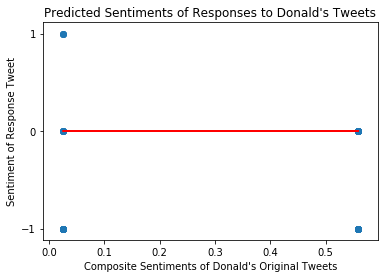

In [78]:
import matplotlib.pyplot as plt


plt.scatter(testing_data_X['donald_comp_sentiment'], testing_data_y['classification'])
plt.plot(testing_data_X['donald_comp_sentiment'], predictions, color='red')
plt.xlabel("Composite Sentiments of Donald's Original Tweets")
plt.ylabel("Sentiment of Response Tweet")
plt.title("Predicted Sentiments of Responses to Donald's Tweets")
plt.yticks(np.arange(min(x) - 1, max(x) + 2, 1.0))
plt.show()

<b> Notes about the graph </b>

As you can see, our SVM exclusively predicted results of zero, regardless of the sentiment of the presidential tweet to which they were replying. This is the encoded value for what was originally -1, or negative sentiment. While it is not ideal to have the visualization showing the encoded values rather than the original values, it is incredibly difficult to decode the values, and we were  not able to find a way to do so. So the graph must be viewed with encoded values in mind.

## Conclusion

<b> Why did the SVM predict exclusively negative reply sentiments?</b>

There are a couple of factors as to why our SVM could have predicted exclusively negative reply sentiments. Firstly,  our sample was very small compared to most classification datasets, so we couldn’t be as accurate with our features as we could have been with a larger dataset. 

Secondly, instead of choosing random presidential tweets, we selected only those from a certain day. This may have created a bias, as we did not monitor Trump’s activities for the day, and it's possible that users were responding not only to his tweets but to his offline activities, as well. 

Thirdly, since we classified our target values for the SVM by hand, there could be inherent bias or misunderstandings in those classifications. Many tweets involve other users in conversations, and without knowing the context of the conversation, it's difficult to detect exactly what the sentiment behind each reply was. Still other tweets contained  images that couldn't be seen in the text. We automatically classified such image tweets as neutral, but in reality the images may not have been neutral—for example, they could have been positive or negative reaction GIFs. 

Fourthly, our hashtag and followers features were computer manually. We did not pull the hashtags and the followers from a certain dataset that was known to encompass all anti- and pro-Trump Twitter users and hashtags, since no such datasets exist. Instead, we strove to generate this information by parsing information about the users and their tweets. It's quite possible that we missed some information regarding folloewrs or hashtags that would be crucial in the interpretation and classification of our dataset. 

Finally, people who bother replying to any political figure's tweet in general are more likely to have a very strong opinion on the tweet or figure in question, so our data is somewhat biased in that sense, as well. There are not likely to be many neutral tweets in reply to President Trump, but rather either very positive or very negative ones.

All in all, creating this project was a learning process. As we scraped, manipulated, and computed data, we realized that the project wasn't as simple as it seemed. We found limitations with Tweepy, such as limits on the number of tweets we could get at one time, or how far back in time we could reach for tweets. We found limitations with NLTK, such as its poor performance in such polarized settings where sarcasm will frequently be involved. We found limitations with using pandas and scikit-learn in tandem, since they require the use of an encoder to work together, and that encoder makes the resulting data much more difficult to interpret.

The main takeaway from this project is that there were inherent flaws with the experiment itself. The responses to President Trump were so much more overwhelmingly negative than even we expected them to be that to train an SVM with them resulted in an SVM that appears only to spit out negative values. It certainly does speak to the negative attitude that the majority of vocal Twitter users have toward President Trump. However, were we to run this experiment again, it would be helpful to do it with a more diverse and sizeable dataset. 
